# How do open source projects register releases?

In [40]:
import datetime
import json
import re

# %matplotlib inline
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
pd.options.display.max_rows = 1000

import pygit2
#from scipy.stats import wilcoxon
#from scipy.stats import ranksums

In [2]:
import os
import sys

releasy_module = os.path.abspath(os.path.join('..','..','..','dev','releasy'))
if releasy_module not in sys.path:
    sys.path.insert(0, releasy_module)
    
import releasy

In [6]:
# repo_path = os.path.join('..','..','..','repos')
repo_path = 'c:\\Users\\felipecrp\\repos'
projects = pd.read_pickle("projects.zip")

In [7]:
release_regexp = re.compile(r'(?P<prefix>(?:[^\s,]*?)(?=(?:[0-9]+[\._]))|[^\s,]*?)(?P<version>(?:[0-9]+[\._])*[0-9]+)(?P<suffix>[^\s,]*)')

In [17]:
project_df = pd.DataFrame(projects.index)
project_df.set_index(keys=["name"], inplace=True)
project_df['name'] = project_df.index
project_df['language'] = projects.language
project_df['path'] = project_df.name.apply(lambda name: os.path.join(repo_path, *name.split('/')))
project_df['release_files'] = [[] for _ in range(len(project_df.index))]

MultiIndex([], names=['project', 'release'])

In [67]:
release_df = pd.DataFrame(
    columns = ['file', 'tag'], 
    index = pd.MultiIndex(
        levels=[[],[]],
        codes=[[],[]],
        names=['project','release']
    )
)
release_df


,,file,tag
project,release,,


In [71]:
release_df.loc[['xpto','1.2'], 'file'] = True

ValueError: zero-size array to reduction operation maximum which has no identity

In [18]:
def count_suspect_releases(filepath):
    """ check file for releases and return the release count """
    release_count = 0
    with open(filepath, "r", errors='ignore') as file:
        for line in file:
            match_release = release_regexp.search(line)
            if match_release:
                release_count += 1
                
    return release_count

def is_blacklisted(filename):
    return file_blacklist_regexp.match(filename)    

file_blacklist = [
    '\..*',
    'CODE_OF_CONDUCT(\..*)?',
    'README(\..*)?',
    'LICENSE(\..*)?',
    'config(\..*)?',
    'configure(\..*)?',
    'makefile(\..*)?',
    'CONTRIBUTING(\..*)?',
    'AUTHORS(\..*)?',
    'BUILD(\..*)?',
    'BUILDING(\..*)?',
    'UPGRADING(\..*)?',
    'UPGRADE(\..*)?',
    'MIGRATION(\..*)?',
    'SECURITY(\..*)?',
    'VULNERABILITIES(\..*)?',
    'TESTING(\..*)?',
    'BREAKING(\..*)?',
    'COPYING(\..*)?',
    'PLUGIN_DEV(\..*)?',
    'PLUGIN(\..*)?',
    'dockerfile(\..*)?',
    'INSTALL(\..*)?',
    'EXTENSIONS(\..*)?',
    'go(\..*)?',
    '.*\.json',
    '.*\.js',
    '.*\.ts',
    '.*\.php',
    '.*\.css',
    '.*\.lock',
    '.*\.py',
    '.*\.gyp',
    '.*\.sublime-project',
    '.*\.bat',
    '.*\.png',
    '.*\.sh',
    '.*\.gif',
    '.*\.config',
    '.*\.props',
    '.*\.cfg',
    '.*\.conf',
    '.*\.c',
    '.*\.go',
    '.*\.gemspec',
    '.*\.in',
    '.*\.perl',
    'docker-compose.yml',
    'pipfile',
    'gemfile',
    'pom.xml',
    'CMakeLists.txt',
    'API.md',
    'azure-pipelines.yml',
    'CopyrightNotice.txt',
    'ThirdPartyNoticeText.txt',
    'ThirdPartyNotices.txt',
    'netlify.toml',
    'gradle.properties',
    'gradlew',
    'settings.gradle',
    'Vagrantfile',
    'Jenkinsfile',
    'mvnw(\..*)?',
    'phpunit',
    'phpdoc',
    'WORKSPACE',
    'android-configure',
    'functional.yaml',
    'tox.ini',
    'blns.txt',
    'msfdb',
    'shippable.yml',
    'Doxyfile',
    'MacOSX-Framework',
    'BENCHMARKS.md',
]
file_blacklist_regexp = re.compile("|".join(file_blacklist), re.IGNORECASE)
file_blacklist_regexp

release_regexp = re.compile(r'(?P<prefix>(?:[^\s,]*?)(?=(?:[0-9]+[\._]))|[^\s,]*?)(?P<version>(?:[0-9]+[\._])+[0-9]+)(?P<suffix>[^\s,]*)')

In [19]:
prj_using_changelog = {}
for prj in project_df.itertuples():
    #if os.path.isdir(prj.path):
    files = (f for f in os.listdir(prj.path) if os.path.isfile(os.path.join(prj.path, f)))
    for filename in files:
        if not is_blacklisted(filename):
            filepath = os.path.join(prj.path, filename)
            release_count = count_suspect_releases(filepath)
            if release_count > 10:
                #print(f'{release_count:4} {filename:35} {prj.name:35} ')
                prj_using_changelog[prj.name] = 1
                project_df.loc[prj.name, 'release_files'].append(filename)
print(len(prj_using_changelog.keys()))

46


Seleciona o arquivo principal de releases.

O melhor talvez fosse procurar o arquivo que tem mais releases.

In [20]:
project_df['main_release_file'] = project_df['release_files'].apply(lambda files: re.sub(r'[^a-z]+.*$', '', files[0].lower()) if files else '')

### Distribuição de projetos com arquivo de releases

In [24]:
list(project_df.groupby(['language'])['name'])

[('C',
  name
  netdata/netdata                          netdata/netdata
  antirez/redis                              antirez/redis
  git/git                                          git/git
  php/php-src                                  php/php-src
  Genymobile/scrcpy                      Genymobile/scrcpy
  ggreer/the_silver_searcher    ggreer/the_silver_searcher
  FFmpeg/FFmpeg                              FFmpeg/FFmpeg
  tmux/tmux                                      tmux/tmux
  obsproject/obs-studio              obsproject/obs-studio
  curl/curl                                      curl/curl
  Name: name, dtype: object),
 ('C#',
  name
  shadowsocks/shadowsocks-windows                shadowsocks/shadowsocks-windows
  PowerShell/PowerShell                                    PowerShell/PowerShell
  dotnet/aspnetcore                                            dotnet/aspnetcore
  Wox-launcher/Wox                                              Wox-launcher/Wox
  mxgmn/WaveFunctionCollaps

In [37]:
# projetos que não usam release file
project_df[project_df['main_release_file'] == ''].groupby(['language'])['name'].count()

language
C             7
C#            9
C++           6
Go            5
Java          6
JavaScript    4
PHP           2
Python        6
Ruby          5
TypeScript    4
Name: name, dtype: int64

In [31]:
# projetos que usam release file
project_df[project_df['main_release_file'] != ''].groupby(['language'])['name'].count()

language
C             3
C#            1
C++           4
Go            5
Java          4
JavaScript    6
PHP           8
Python        4
Ruby          5
TypeScript    6
Name: name, dtype: int64

In [38]:
project_df.groupby(['language','main_release_file'])['name'].count()

language    main_release_file
C                                7
            changelog            2
            changes              1
C#                               9
            changes              1
C++                              6
            changelog            2
            changes              1
            release              1
Go                               5
            changelog            5
Java                             6
            changelog            3
            changes              1
JavaScript                       4
            changelog            5
            changes              1
PHP                              2
            changelog            8
Python                           6
            changelog            2
            changes              1
            history              1
Ruby                             5
            changelog            3
            changes              1
            history              1
TypeScript               

<IPython.core.display.Javascript object>


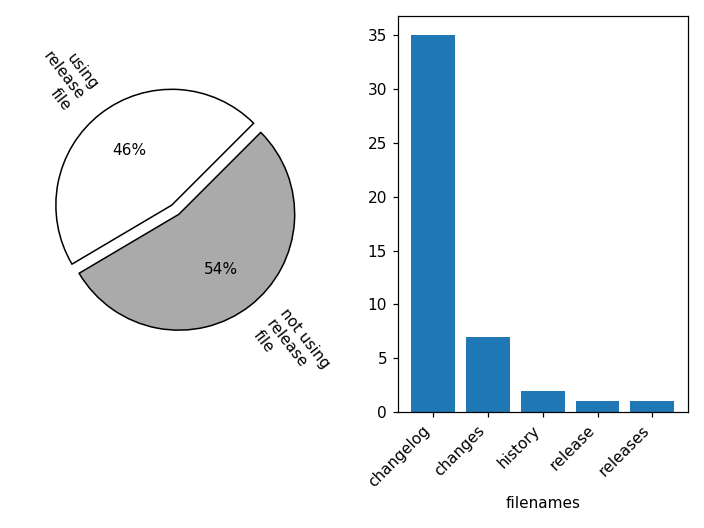

In [15]:
fig = plt.figure()

ax = plt.subplot(121)

n_projects = len(project_df)
n_projects_using_rel_files = len(project_df[project_df['main_release_file'] != ''])
ax.pie(
    [n_projects_using_rel_files, n_projects - n_projects_using_rel_files],
    labels=['using\nrelease\nfile','not using\nrelease\nfile'], 
    autopct='%1.0f%%',
    startangle=45,
    explode=[0.1,0],
    colors=['#ffffff','#aaaaaa'],
    wedgeprops={"edgecolor":"k"},
    rotatelabels =True,
    labeldistance=1)


ax = plt.subplot(122)
#project_df.groupby(['main_release_file'])['name'].count().plot.bar(stacked=True, ax=ax)
ax.set_xlabel('filenames')

x = list(project_df.groupby(['main_release_file'])['name'].count().index)
x = x[1:]
y = list(project_df.groupby(['main_release_file'])['name'].count())
y = y[1:]

ax.bar(
    x=x,
    height=y,
    #colors=['#000000']
)
ax.set_xticklabels(x, rotation=45, ha='right')

plt.tight_layout()

## Comparing releases in files and tags

In [47]:
release_regexp = re.compile(r'(?P<prefix>(?:[^\s,]*?)(?=(?:[0-9]+[\._]))|[^\s,]*?)(?P<version>(?:[0-9]+[\._])*[0-9]+)(?P<suffix>[^\s,]*)')
nom_releases = 0
ntags = 0
for prj in project_df.itertuples():
    repo = pygit2.Repository(prj.path)
    tags = (ref for ref in repo.references.objects if ref.name.startswith('refs/tags/'))
    tagnames = (tag.shorthand for tag in tags)
    for tagname in tagnames:
        release_match = release_regexp.search(tagname)
        ntags += 1
        if not release_match:
            #print(prj.name, tagname)
            nom_releases += 1

print(nom_releases,ntags)
            
    

146 21131


In [139]:
for prj in project_df.itertuples():
    project = releasy.mine(prj.path)
    project_df.loc[prj.Index, "data"] = project
    
    files = (f for f in os.listdir(prj.path) if os.path.isfile(os.path.join(prj.path, f)))
    release_files = {}
    release_versions = {}
    
    releases = {}
    for release in prj.data.releases:
        if release.name not in releases:
            releases[release.name] = 1
    
    for filename in files:
        if filename != 'CHANGELOG.md':
            continue
        filepath = os.path.join(prj.path, filename)
        file = open(filepath, "r", errors='ignore')
        for line in file:
            match = release_regexp.search(line)
            if match:
                release = ''.join(match.groups())
                if release not in release_versions:
                    release_versions[release] = 1
                    if filename not in release_files:
                        release_files[filename] = 0
                    release_files[filename] += 1
                    if release not in releases:
                        print(prj.name, filename, release, line[0:80])
                    
                
    for key in release_files.keys():
        print(prj.name, release_files[key], key)
    print(prj.name, len(prj.data.releases))
    

angular/angular CHANGELOG.md name="9.0.0-next.8"></a> <a name="9.0.0-next.8"></a>

angular/angular CHANGELOG.md [9.0.0-next.8](https://github.com/angular/angular/compare/9.0.0-next.7...9.0.0-next.8) # [9.0.0-next.8](https://github.com/angular/angular/compare/9.0.0-next.7...9.0.0
angular/angular CHANGELOG.md ([#32780](https://github.com/angular/angular/issues/32780)) * **ivy:** ensure `window.ng.getDebugNode` returns debug info for component elem
angular/angular CHANGELOG.md ([#32774](https://github.com/angular/angular/issues/32774)) * **ivy:** ensure multiple map-based bindings do not skip intermediate values ([
angular/angular CHANGELOG.md ([#32710](https://github.com/angular/angular/issues/32710)) * **language-service:** expose determining the NgModule of a Directive ([#32710]
angular/angular CHANGELOG.md ([#32775](https://github.com/angular/angular/issues/32775)) * **ivy:** remove extra SafeStyle detection code ([#32775](https://github.com/an
angular/angular CHANGELOG.md name="8.2.8

angular/angular CHANGELOG.md 3.3 * add support for TypeScript 3.3 (and drop older versions) ([#29004](https://git
angular/angular CHANGELOG.md name="7.2.10"></a> <a name="7.2.10"></a>

angular/angular CHANGELOG.md [7.2.10](https://github.com/angular/angular/compare/7.2.9...7.2.10) ## [7.2.10](https://github.com/angular/angular/compare/7.2.9...7.2.10) (2019-03-
angular/angular CHANGELOG.md name="8.0.0-beta.8"></a> <a name="8.0.0-beta.8"></a>

angular/angular CHANGELOG.md [8.0.0-beta.8](https://github.com/angular/angular/compare/8.0.0-beta.7...8.0.0-beta.8) # [8.0.0-beta.8](https://github.com/angular/angular/compare/8.0.0-beta.7...8.0.0
angular/angular CHANGELOG.md name="7.2.9"></a> <a name="7.2.9"></a>

angular/angular CHANGELOG.md [7.2.9](https://github.com/angular/angular/compare/7.2.8...7.2.9) ## [7.2.9](https://github.com/angular/angular/compare/7.2.8...7.2.9) (2019-03-12
angular/angular CHANGELOG.md name="8.0.0-beta.7"></a> <a name="8.0.0-beta.7"></a>

angular/angular CHANGELOG.md 

angular/angular CHANGELOG.md [6.1.9](https://github.com/angular/angular/compare/6.1.8...6.1.9) ## [6.1.9](https://github.com/angular/angular/compare/6.1.8...6.1.9) (2018-09-26
angular/angular CHANGELOG.md name="6.1.7"></a> <a name="6.1.7"></a>

angular/angular CHANGELOG.md [6.1.7](https://github.com/angular/angular/compare/6.1.6...6.1.7) ## [6.1.7](https://github.com/angular/angular/compare/6.1.6...6.1.7) (2018-09-06
angular/angular CHANGELOG.md name="6.1.6"></a> <a name="6.1.6"></a>

angular/angular CHANGELOG.md [6.1.6](https://github.com/angular/angular/compare/6.1.5...6.1.6) ## [6.1.6](https://github.com/angular/angular/compare/6.1.5...6.1.6) (2018-08-29
angular/angular CHANGELOG.md name="6.1.4"></a> <a name="6.1.4"></a>

angular/angular CHANGELOG.md [6.1.4](https://github.com/angular/angular/compare/6.1.3...6.1.4) ## [6.1.4](https://github.com/angular/angular/compare/6.1.3...6.1.4) (2018-08-22
angular/angular CHANGELOG.md ([#25586](https://github.com/angular/angular/issues/25586)) 


angular/angular CHANGELOG.md [5.2.1](https://github.com/angular/angular/compare/5.2.0...5.2.1) ## [5.2.1](https://github.com/angular/angular/compare/5.2.0...5.2.1) (2018-01-17
angular/angular CHANGELOG.md 3.6.0 * **benchpress:** should still support selenium_webdriver < 3.6.0 ([#21477](http
angular/angular CHANGELOG.md name="5.2.0"></a> <a name="5.2.0"></a>

angular/angular CHANGELOG.md [5.2.0](https://github.com/angular/angular/compare/5.2.0-rc.0...5.2.0) # [5.2.0](https://github.com/angular/angular/compare/5.2.0-rc.0...5.2.0) (2018-0
angular/angular CHANGELOG.md ES6 * **bazel:** Give correct module names for ES6 output ([#21320](https://github.c
angular/angular CHANGELOG.md 63 * **benchpress:** work around missing events from Chrome 63 ([#21396](https://gi
angular/angular CHANGELOG.md ([#20983](https://github.com/angular/angular/issues/20983)) * **common:** export currencies via `getCurrencySymbol` ([#20983](https://github
angular/angular CHANGELOG.md name="5.2.0-rc.0"></a> <a name=

angular/angular CHANGELOG.md ([#16438](https://github.com/angular/angular/issues/16438)) * **compiler-cli:** import routing module with forRoot ([#16438](https://github.
angular/angular CHANGELOG.md ([#16712](https://github.com/angular/angular/issues/16712)) * **platform-server:** wait for async app initializers to complete before removi
angular/angular CHANGELOG.md ([#16759](https://github.com/angular/angular/issues/16759)) * **router:** Wrap Promise-like instances in native Promises ([#16759](https://g
angular/angular CHANGELOG.md ([#16706](https://github.com/angular/angular/issues/16706)) * **upgrade:** Prevent renaming of $inject property ([#16706](https://github.com
angular/angular CHANGELOG.md ([#16724](https://github.com/angular/angular/issues/16724)) * **upgrade:** use quote to prevent ClossureCompiler obfuscating $event. ([#1672
angular/angular CHANGELOG.md name="4.2.0-beta.1"></a> <a name="4.2.0-beta.1"></a>

angular/angular CHANGELOG.md [4.2.0-beta.1](https://github.com/angu

angular/angular CHANGELOG.md ([#14788](https://github.com/angular/angular/issues/14788)) * delete pre-view-engine core, compiler, platform-browser, etc code ([#14788](ht
angular/angular CHANGELOG.md ([5caab71](https://github.com/angular/angular/commit/5caab71f7dc64b10f3544b2a3b2650e1666adbf1)) * **compiler:** make identifiers for generated code small to improve dev size ([
angular/angular CHANGELOG.md name="4.0.0-rc.1"></a> <a name="4.0.0-rc.1"></a>

angular/angular CHANGELOG.md [4.0.0-rc.1](https://github.com/angular/angular/compare/4.0.0-beta.8...4.0.0-rc.1) # [4.0.0-rc.1](https://github.com/angular/angular/compare/4.0.0-beta.8...4.0.0-r
angular/angular CHANGELOG.md 4.0.0-RC.1 We are excited to share 4.0.0-RC.1 with the community. This is a feature-complet
angular/angular CHANGELOG.md Doc](https://docs.google.com/document/d/195L4WaDSoI_kkW094LlShH6gT3B7K1GZpSBnnLkQR-g/preview) Weâ€™ve made changes under the hood to what AOT generated code looks like. These
angular/angular CHANGELOG.m

angular/angular CHANGELOG.md ([#12987](https://github.com/angular/angular/issues/12987)) * **language-service:** add services to support editors ([#12987](https://github
angular/angular CHANGELOG.md ([42cf06f](https://github.com/angular/angular/commit/42cf06f)) * **router:** add support for custom route reuse strategies ([42cf06f](https://g
angular/angular CHANGELOG.md ([c1a62e2](https://github.com/angular/angular/commit/c1a62e2)) * **tools:** allow disabling annotation lowering ([c1a62e2](https://github.com/a
angular/angular CHANGELOG.md name="2.2.4"></a> <a name="2.2.4"></a>

angular/angular CHANGELOG.md [2.2.4](https://github.com/angular/angular/compare/2.2.3...2.2.4) ## [2.2.4](https://github.com/angular/angular/compare/2.2.3...2.2.4) (2016-11-30
angular/angular CHANGELOG.md ([eba53fd](https://github.com/angular/angular/commit/eba53fd)) * **common:** update DatePipe to allow closure compilation ([eba53fd](https://gi
angular/angular CHANGELOG.md ([eb173bc](https://github.com/angular

In [138]:
filepath = filepath = os.path.join(prj.path, '1')
file = open(filepath, "r", encoding='utf-16-le')
i = 0
for line in file:
    
    print(line)
    match = release_regexp.search(line)
    if match:
        release = ''.join(match.groups())
        print(i,release, match.group('version'), match.group('suffix'))
    i+=1
    if i > 5:
        break
    

﻿2.0.0

0 ﻿2.0.0 2.0.0 
2.0.1

1 2.0.1 2.0.1 
2.0.2

2 2.0.2 2.0.2 
2.1.0

3 2.1.0 2.1.0 
2.1.0-beta.0

4 2.1.0-beta.0 2.1.0 -beta.0
2.1.0-rc.0

5 2.1.0-rc.0 2.1.0 -rc.0


In [73]:
match.group('version')

AttributeError: 'NoneType' object has no attribute 'group'

In [41]:
(file for file in os.listdir(prj.path) if os.path.isfile(os.path.join(prj.path, file)))

<generator object <genexpr> at 0x0000025EF42F5F90>

In [76]:
match = release_regexp.search('a2.2.3a')

In [83]:
''.join(match.groups())

'a2.2.3a'

In [35]:
for file in os.listdir(prj.path) if os.path.isfile(file):
    print(file)

SyntaxError: invalid syntax (<ipython-input-35-c18e90599046>, line 1)

In [14]:
project = project_df.iloc[0].data

In [16]:
len(project.tags)

361

In [17]:
len(project.releases)

358

In [18]:
len(project.commits)

19684

In [22]:
release_regexp = re.compile(r'(?P<prefix>(?:[^\s]*?)(?=(?:[0-9]+[\._]))|[^\s]*?)(?P<version>(?:[0-9]+[\._])*[0-9]+)(?P<suffix>[^\s]*)')

In [26]:
count = 0
for commit in project.commits:
    match = release_regexp.match(commit.message)
    if match:
        count+=1
        print(commit.message, match.group('version'))
print(count)

docs(12_zones.md): Fix typos and inconsistent capitalization

Closes #893
 12
docs(02_directives.md): Change the description of bind property

Also add attribute open to the html

Closes #767
 02
tests(e2e): upgrade Protractor to 1.7.0 and remove special cases for shadow dom

With Protractor 1.7.0, which installs chromedriver 2.14, shadow DOM is supported.
 2
docs(core/01_templates): add <pre> tags to improve layout

Closes #687
 01
docs(02_directives): TemplateConfig -> @Template

Update docs with new template api and remove previous cssUrl api
 02
docs(01_templates.md): typos

Fix spelling errors in 01_templates.md

Closes #585
 01
fix(e2e): adds events to hello world static.

Extends e2e test to cover events.
 2
fix(Dart1.8): Promise handling
 1.8
fix(Dart1.8): fix analyzer warnings
 1.8
fix(js2dart): make tests work again
 2
refactor(js2dart): use the parent functionalities as mush as possible

Closes #18
 2
refactor(js2dart): refactor dart library statement

fixes #12
closes #16 2

145


In [5]:
count = 1
projects["data"] = None
for name, project in projects[(projects.data.isnull())].iterrows():
    print(f"{datetime.datetime.now()} - {count:3} - Processing {name}")
    project_group, project_name = name.split("/") 
    path = os.path.join(repo_path, project_group, f"{project_name}.git")
    projects.loc[name, "path"] = path    
    
    mine_params = {
        "track_base_release": False
    }
    if name in release_mine_params:
        mine_params.update(release_mine_params[name])
    
    miner = releasy_miner.Miner(name=name,vcs=releasy_git.GitVcs(path), **mine_params)
    project = miner.mine_commits()
    projects.loc[name, "data"] = project
    count += 1
print(f"{datetime.datetime.now()} - Ended")

,description,stars,url,git_url,language,created_at,active
name,,,,,,,
freeCodeCamp/freeCodeCamp,The https://www.freeCodeCamp.org open source c...,308061.0,https://api.github.com/repos/freeCodeCamp/free...,git://github.com/freeCodeCamp/freeCodeCamp.git,JavaScript,2014-12-24 17:49:19,True
vuejs/vue,"🖖 Vue.js is a progressive, incrementally-adopt...",155509.0,https://api.github.com/repos/vuejs/vue,git://github.com/vuejs/vue.git,JavaScript,2013-07-29 03:24:51,True
facebook/react,"A declarative, efficient, and flexible JavaScr...",142182.0,https://api.github.com/repos/facebook/react,git://github.com/facebook/react.git,JavaScript,2013-05-24 16:15:54,True
twbs/bootstrap,"The most popular HTML, CSS, and JavaScript fra...",138078.0,https://api.github.com/repos/twbs/bootstrap,git://github.com/twbs/bootstrap.git,JavaScript,2011-07-29 21:19:00,True
facebook/react-native,A framework for building native apps with React.,84064.0,https://api.github.com/repos/facebook/react-na...,git://github.com/facebook/react-native.git,JavaScript,2015-01-09 18:10:16,True
facebook/create-react-app,Set up a modern web app by running one command.,75160.0,https://api.github.com/repos/facebook/create-r...,git://github.com/facebook/create-react-app.git,JavaScript,2016-07-17 14:55:11,True
axios/axios,Promise based HTTP client for the browser and ...,68592.0,https://api.github.com/repos/axios/axios,git://github.com/axios/axios.git,JavaScript,2014-08-18 22:30:27,True
nodejs/node,Node.js JavaScript runtime :sparkles::turtle::...,67073.0,https://api.github.com/repos/nodejs/node,git://github.com/nodejs/node.git,JavaScript,2014-11-26 19:57:11,True
FortAwesome/Font-Awesome,"The iconic SVG, font, and CSS toolkit",61836.0,https://api.github.com/repos/FortAwesome/Font-...,git://github.com/FortAwesome/Font-Awesome.git,JavaScript,2012-02-17 14:19:43,True
